# Pandas & RandomForest

### 랜덤 포레스트 사용하기 : 버섯 분류(독버섯과 식용버섯)


- 독버섯 데이터셋 저장 : url로 부터 독버섯 데이터를 불러와 mushroom.csv로 저장합니다.

In [ ]:
import urllib.request as req
local= "mushrooms.csv"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
req.urlretrieve(url, local)
print("ok")

- 랜덤 포레스트를 사용한 독버섯 분류 예제 1

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [6]:
# 데이터 읽어 들이기--- (※1)
data = pd.read_csv("mushrooms.csv")
# data = pd.read_csv('mushroom.csv', columns = col)

In [7]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
data.colum

## 1. 데이터 살펴보기

### 구조 살펴보기(X, Y / 데이터타입 / 불필요한 데이터 정리(Null 등))

In [12]:
data.head()

,is_poison,a,b,c,d,e,f,g,h,i,...,m,n,o,p,q,r,s,t,u,v
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
data.tail()

In [ ]:
data.shape  # 크기

In [ ]:
data.describe   #head + tail + shape

In [ ]:
data.dtypes  # column 별 데이터 타입 확인 / object, int, float..

In [ ]:
data.info()

In [ ]:
pd.isnull(data)  # null 값을 찾는 메트릭스

In [ ]:
import numpy as np
np.where(pd.isnull(data))     #Null 값이 있는 위치 찾음

,a,b,c,d,e,f,g,h,i,j,...,m,n,o,p,q,r,s,t,u,v
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
5,x,y,y,t,a,f,c,b,n,e,...,s,w,w,p,w,o,p,k,n,g
6,b,s,w,t,a,f,c,b,g,e,...,s,w,w,p,w,o,p,k,n,m
7,b,y,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,s,m
8,x,y,w,t,p,f,c,n,p,e,...,s,w,w,p,w,o,p,k,v,g
9,b,s,y,t,a,f,c,b,g,e,...,s,w,w,p,w,o,p,k,s,m


### 시각화 ( 변수간 영향 파악 / 주요요인 가정 등)

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.

In [ ]:
# 보기 편하게 하기 위해 그림 사이즈 변경
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 12,3

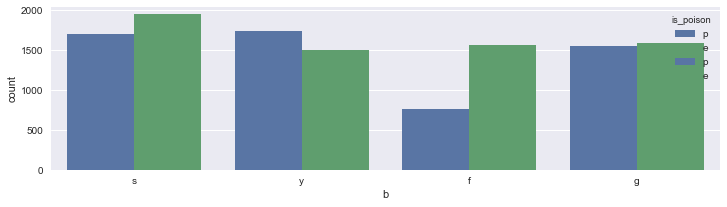

In [26]:
# sns.countplot(data=data, x='1', hue= '0')
sns.countplot(data=data, x='a', hue= 'is_poison')
sns.countplot(data=data, x='b', hue= 'is_poison')

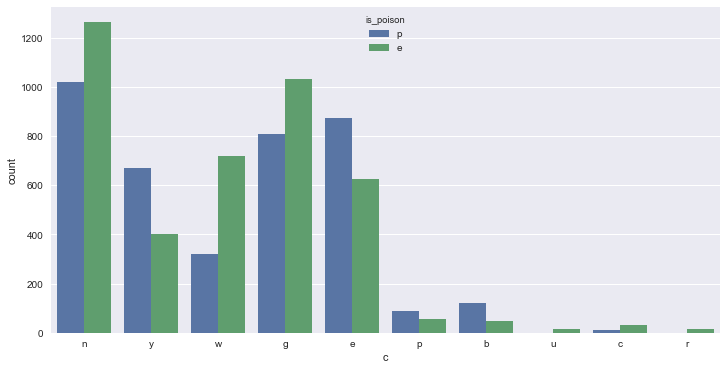

In [65]:
sns.countplot(data=data, x='c', hue= 'is_poison')

In [40]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 12, 6

In [58]:
data.head()

,is_poison,a,b,c,d,e,f,g,h,i,...,m,n,o,p,q,r,s,t,u,v
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# 2. 데이터 나누기(학습/테스트)

In [86]:
data_x = data[cols[1:]]
data_y = data[cols[0]]

# 3. 분류모델 학습하기

### pd.get_dummies: 명목형 변수 정리하기

In [88]:
data_x = pd.get_dummies(data_x, drop_first=True)   # one-hot

In [ ]:
# c.f) 교재내용
# 데이터 내부의 분류 변수 전개하기
label = []
data = []
attr_list = []
for row_index, row in mr.iterrows():
    label.append(row.loc[0])
    exdata = []
    for col, v in enumerate(row.iloc[1:]):   # enumerate : 값과 index를 반환할 때 사용
        if row_index == 0:
            attr = {"dic": {}, "cnt":0}
            attr_list.append(attr)
        else:
            attr = attr_list[col]
        # 버섯의 특징 기호를 배열로 나타내기
        d = [0,0,0,0,0,0,0,0,0,0,0,0]    # 하나의 특징을 총 12개의 요소를 가지는 배열로 one hot encoding 합니다. (22 * 12)
        if v in attr["dic"]:
            idx = attr["dic"][v]
        else:
            idx = attr["cnt"]
            attr["dic"][v] = idx
            attr["cnt"] += 1
        d[idx] = 1
        exdata += d
    data.append(exdata)

In [89]:
# 학습 전용과 테스트 전용 데이터로 나누기 --- (※3)
data_train, data_test, label_train, label_test = train_test_split(data_x, data_y) # train , test 비율을 3:1 비율로 나누어 줍니다.

In [90]:
# 데이터 학습시키기 --- (※4)
clf = RandomForestClassifier()
clf.fit(data_train, label_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

# 4. 분류 결과 확인하기

In [94]:
# 데이터 예측하기 --- (※5)
predict = clf.predict(data_test)
# 결과 테스트하기 --- (※6)
ac_score = metrics.accuracy_score(label_test, predict)
cl_report = metrics.classification_report(label_test, predict)
print("정답률 =", ac_score)
print("리포트 =\n", cl_report)

정답률 = 1.0
리포트 =
              precision    recall  f1-score   support

          e       1.00      1.00      1.00      1091
          p       1.00      1.00      1.00       940

avg / total       1.00      1.00      1.00      2031



# 5. 결과 해석하기

In [102]:
ifs = clf.feature_importances_  # 제일 중요한 factor 

factor_check ={}
for i, score in enumerate(ifs):
    print('{} : {}'.format(data_x.columns.values[i] , score))
    factor_check[data_x.columns.values[i]]=score
    

a_c : 0.0001720731247411862
a_f : 0.0012028700422813481
a_k : 0.0002678170534618809
a_s : 0.0008627648487312841
a_x : 0.0009420489721519863
b_g : 0.0
b_s : 0.013415983732367987
b_y : 0.0019783204926382297
c_c : 0.001016437858843768
c_e : 0.000173776723036233
c_g : 0.0004121600623038199
c_n : 0.002582428584852661
c_p : 0.001827838643767537
c_r : 0.0
c_u : 0.0
c_w : 0.0012232366883411074
c_y : 0.00230991863672978
d_t : 0.004810429637138227
e_c : 0.0030101991485709254
e_f : 0.09558659693771379
e_l : 0.003862061077880407
e_m : 0.0
e_n : 0.12133709004620011
e_p : 0.00479697599459863
e_s : 0.015782202194303697
e_y : 0.0001876079813034446
f_f : 0.004141762720492982
g_w : 0.05121903852168279
h_n : 0.16263752233875023
i_e : 0.0
i_g : 0.000788242280748138
i_h : 0.003518145552294108
i_k : 0.0005644832352291348
i_n : 0.011152070359589395
i_o : 0.0
i_p : 0.0025553120758419028
i_r : 0.0013357916323060311
i_u : 2.427782008838477e-05
i_w : 0.007540840627353237
i_y : 0.0
j_t : 0.01571933606040552
k_b :

In [104]:
max(factor_check)

'v_w'

In [106]:
sorted_factor = sorted(factor_check.items(), key=lambda x:x[1], reverse=True)

In [107]:
print(sorted_factor)

[('h_n', 0.16263752233875023), ('e_n', 0.12133709004620011), ('e_f', 0.095586596937713791), ('s_p', 0.058534886773094909), ('g_w', 0.051219038521682789), ('m_k', 0.04586922839307174), ('l_k', 0.045156080950512205), ('s_l', 0.042611089207776356), ('l_s', 0.035369406119853605), ('k_e', 0.031712845955535099), ('t_k', 0.027895145148215887), ('u_v', 0.025556108519317437), ('e_s', 0.015782202194303697), ('j_t', 0.015719336060405521), ('t_h', 0.014588252347140895), ('b_s', 0.013415983732367987), ('i_n', 0.011152070359589395), ('u_c', 0.010845049148353344), ('t_r', 0.010552582233046684), ('v_g', 0.010295992426057317), ('o_w', 0.010117096772427558), ('k_b', 0.0097858921107668549), ('u_y', 0.0096434369850356642), ('k_c', 0.0092243256743588485), ('n_w', 0.0092035836105584055), ('i_w', 0.0075408406273532371), ('t_w', 0.007349317006634085), ('v_u', 0.0064139656608373395), ('r_o', 0.0055898143392481454), ('t_u', 0.0051979858272053706), ('t_n', 0.0049980130851167964), ('d_t', 0.0048104296371382273), 

### 추가) pandas 활용하여 데이터 전환하기(정리)

In [ ]:
# cf) 교재 내용

# 데이터 내부의 기호를 숫자로 변환하기--- (※2)
label = []
data = []
attr_list = []
for row_index, row in mr.iterrows():
    label.append(row.loc[0])
    row_data = []
    for v in row.iloc[1:]:
        row_data.append(ord(v))  # 참고 : ord() 는 문자의 아스키 값을 반환하여 줍니다. a ~ z -> 97 ~ 122, ? -> 63
    data.append(row_data)

### pandas 활용해서 데이터 변환하기   pd.applymap / pd.apply

In [ ]:
# pd.applymap(함수)  ==> 원소별 함수 적용

mr_edit2 = pd.DataFrame()
mr_edit2 = mr.applymap(lambda x: ord(x))

In [ ]:
mr_edit2.head()

In [ ]:
# pd.apply(함수) ==>  column 별 함수 적용  /   cf) pd.apply(함수, axis = 1)

mr_edit3 = pd.DataFrame()
for column in mr.columns:
    mr_edit3[column] = mr[column].apply(lambda x: ord(x))

In [ ]:
# 학습 전용과 테스트 전용 데이터로 나누기 --- (※3)
data_train, data_test, label_train, label_test = \
    train_test_split(data, label) # train , test 비율을 3:1 비율로 나누어 줍니다.

In [ ]:
print('data_train의 수 : ', len(data_train))
print('data_test의 수 : ', len(data_test))

In [ ]:
# 데이터 학습시키기 --- (※4)
clf = RandomForestClassifier()
clf.fit(data_train, label_train)